In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

## Decodificación y codificación del problema

In [2]:
#Funcion para codificar los numeros del 0-63 a binario, en un string, y poder representarlos
def decimal_a_binario(numero_decimal):
    numbin = []
    binario_texto = []
    gene = 0
    if(numero_decimal>=0 and numero_decimal<=63):
        while (gene <= 5):
            numbin.insert(0, numero_decimal % 2)
            numero_decimal //= 2
            gene+=1
        binario_texto= "".join(str(e) for e in numbin)
    else:
        binario_texto = "numero incompatible. No puede ser representado con 6 bits"
    return binario_texto

In [3]:
#Funcion para decodificar el numero binario (poblador) a número decimal del 0-63 y mapearlo en el rango de -1 a 1
def binario_a_decimal(binario_texto):
    valor = 0
    i=0
    cadena_aux = binario_texto[::-1] #Invierte la cadena
    while i<len(binario_texto):
        valor += int( cadena_aux[i] ) * 2**i #Convierte a valor binario el decimal
        i = i + 1
    valor = ( ( valor/63 ) * 2 ) - 1
    return valor

## Evaluación de aptitud

In [4]:
#Función que evalúa la aptitud de cierto número de pobladores, contra la función y = x^2, después de decodificarla.
def evaluacion_aptitud(poblacion):
    n = len(poblacion)
    aptitud = []
    valor_grafico = []
    matriz_con_aptitud = pd.DataFrame()
    for i in range(n):
        valor_grafico.append(binario_a_decimal(poblacion[i])) #Se recupera el valor de la variable de 6 bits codificada (valor en eje x [-1, 1])
        aptitud.append(valor_grafico[i]**2) #Dicho valor se eleva al cuadrado para obtener la aptitud del individuo
    matriz_con_aptitud["POBLACION"] = poblacion #Valor de 6 bits con alelos {0,1} del individuo
    matriz_con_aptitud["APTITUD"] = aptitud #Aptitud del individuo
    matriz_con_aptitud["VALOR CODIFICADO"] = valor_grafico #Valor decodificado (útil para graficar)
    return matriz_con_aptitud

## **Métodos de selección**
### 1) Ranking
### 2) Ruleta
### 3) Aleatorio monogámico
### 4) Aleatorio poligámico
### 5) Torneo

In [5]:
def rank_selection(poblacion):
    n = len(poblacion) #n = numero de elementos a obtener (hijos)
    num_genes = len(poblacion[0]) #Calcula el numero de genes (por si en algun punto debe escalar a más genes pares)
    i = 0
    poblacion_hijos = []
    while ( i < n ):
        #Hijos generados (dos posibles, por cada pareja de padres seleccionados)
        #hijo_1, hijo_2 = cruza_un_corte(poblacion[i], poblacion[i+1]) # CRUZA 1 CORTE
        hijo_1, hijo_2 = cruza_homogenea(poblacion[i], poblacion[i+1]) # CRUZA HOMOGÉNEA
        
        poblacion_hijos.append(hijo_1)
        poblacion_hijos.append(hijo_2)
        i+=2
    return poblacion_hijos

In [6]:
def ruleta(poblacion, aptitud):
    n = len(poblacion) #n = numero de elementos a obtener (hijos)
    num_genes = len(poblacion[0]) #Calcula el numero de genes (por si en algun punto debe escalar a más genes pares)
    i = 0
    poblacion_hijos = []
    #Vector auxiliar para calcular la distribucion de probabilidad del ranking
    probabilidad_padre = aptitud / np.sum(aptitud) #Distribucion de probabilidad por ranking
    while ( i < (n/2) ):
        #Hijos generados (dos posibles, por cada pareja de padres seleccionados)
        padre1 = np.random.choice(poblacion, 1, p=probabilidad_padre)
        padre2 = np.random.choice(poblacion, 1, p=probabilidad_padre)

        #hijo_1, hijo_2 = cruza_un_corte(padre1[0], padre2[0]) #CRUZA UN CORTE
        hijo_1, hijo_2 = cruza_homogenea(padre1[0], padre2[0]) # CRUZA HOMOGÉNEA
        poblacion_hijos.append(hijo_1)
        poblacion_hijos.append(hijo_2)
        i+=1
    return poblacion_hijos

In [7]:
def aleatorio_monogamico(poblacion):
    n = len(poblacion) #n = numero de elementos a obtener (hijos)
    num_genes = len(poblacion[0]) #Calcula el numero de genes (por si en algun punto debe escalar a más genes pares)
    i = 0
    poblacion_disponible = poblacion.to_list().copy()
    poblacion_hijos = []
    while ( i < (n/2) ):
        #Hijos generados (dos posibles, por cada pareja de padres seleccionados, cada pareja es seleccionada aleatoriamente una sola vez)
        pareja = random.sample(poblacion_disponible, 2)

        #hijo_1, hijo_2 = cruza_un_corte(pareja[0], pareja[1]) #CRUZA UN CORTE
        hijo_1, hijo_2 = cruza_homogenea(pareja[0], pareja[1]) # CRUZA HOMOGÉNEA
        poblacion_hijos.append(hijo_1)
        poblacion_hijos.append(hijo_2)
        poblacion_disponible.remove(pareja[0])
        poblacion_disponible.remove(pareja[1])
        i+=2
    return poblacion_hijos

In [8]:
def aleatorio_poligamico(poblacion):
    n = len(poblacion) #n = numero de elementos a obtener (hijos)
    num_genes = len(poblacion[0]) #Calcula el numero de genes (por si en algun punto debe escalar a más genes pares)
    i = 0
    poblacion_disponible = poblacion.to_list().copy()
    poblacion_hijos = []
    while ( i < (n/2) ):
        #Hijos generados (dos posibles, por cada pareja de padres seleccionados, cada integrante de la pareja puede seleccionarse más de una vez)
        pareja = random.choices(poblacion_disponible, k = 2)

        #hijo_1, hijo_2 = cruza_un_corte(pareja[0], pareja[1]) #CRUZA UN CORTE
        hijo_1, hijo_2 = cruza_homogenea(pareja[0], pareja[1]) #CRUZA HOMOGÉNEA
        poblacion_hijos.append(hijo_1)
        poblacion_hijos.append(hijo_2)
        i+=2
    return poblacion_hijos

In [9]:
def tournament(poblacion):
    n = len(poblacion) #n = numero de elementos a obtener (hijos)
    num_genes = len(poblacion[0]) #Calcula el numero de genes (por si en algun punto debe escalar a más genes pares)
    i = 0
    poblacion_disponible = poblacion.to_list().copy()
    poblacion_hijos = []
    while ( i < (n/2) ):
        #Hijos generados (forzosamente con población previamente ordenada), se cruzan padres 1-10, 2-9, 3-8, y así sucesivamente
        #hijo_1, hijo_2 = cruza_un_corte(poblacion[i], poblacion[n-1-i]) #CRUZA UN CORTE
        hijo_1, hijo_2 = cruza_homogenea(poblacion[i], poblacion[n-1-i]) #CRUZA HOMOGÉNEA
        poblacion_hijos.append(hijo_1)
        poblacion_hijos.append(hijo_2)
        #poblacion_hijos.append(poblacion[i][0:int(num_genes/2)] + poblacion[n-1-i][int(num_genes/2):num_genes])
        #poblacion_hijos.append(poblacion[n-1-i][0:int(num_genes/2)] + poblacion[i][int(num_genes/2):num_genes])
        i+=1
    return poblacion_hijos

## Métodos de cruza
### 1) 1 corte
### 2) Homogéneo

In [10]:
def cruza_un_corte(padre1, padre2):
    num_genes = len(padre1)
    hijo_1 = padre1[0:int(num_genes/2)] + padre2[int(num_genes/2):num_genes]
    hijo_2 = padre2[0:int(num_genes/2)] + padre1[int(num_genes/2):num_genes]
    return hijo_1, hijo_2

In [11]:
def cruza_homogenea(padre1, padre2):
    num_genes = len(padre1)
    hijo_1 = []
    hijo_2 = []
    for i in range(num_genes):
        gen_padre = random.randint(0, 1)
        if (gen_padre == 0):
            hijo_1.append(padre1[i])
            hijo_2.append(padre2[i])
        else:
            hijo_1.append(padre2[i])
            hijo_2.append(padre1[i])
            
    hijo_1 = ''.join(hijo_1)
    hijo_2 = ''.join(hijo_2)
    
    return hijo_1, hijo_2

## Progreso de la solución en la generación i (gráficamente)

In [12]:
def grafica_poblacion(matriz_poblacion, i):
    plt.scatter(matriz_poblacion["VALOR CODIFICADO"], matriz_poblacion["APTITUD"], color = "red", label = "pobladores")
    x = np.linspace(-1,1,100)
    y = x ** 2
    plt.plot(x, y, color = "blue")
    aptprom =matriz_poblacion["APTITUD"].mean()
    plt.axhline(y=aptprom, color='purple', linestyle='--', label='Aptitud promedio: ' + "{:.3f}".format(aptprom))
    plt.grid()
    leyenda = 'Población en la generación ' + str(i)
    plt.title(leyenda, weight ="bold");
    plt.xlabel('Eje x');
    plt.ylabel('Eje y');
    plt.legend()
    clear_output(wait=True)
    plt.show()

## Algoritmo genético

In [13]:
# Aplicación de la función para evaluar la aptitud de los pobladores
def algoritmo_genetico(poblacion_codificada, epocas):
    plt.figure()
    matriz_con_aptitud = evaluacion_aptitud(poblacion_codificada)
    matriz_con_aptitud = matriz_con_aptitud.sort_values(by="APTITUD", ascending = False).reset_index(drop=True) # Ordenamiento de los pobladores
    #Grafica de la población en la generación inicial (generación 0).
    grafica_poblacion(matriz_con_aptitud, 0)
    for i in range(epocas):
#METODOS DE SELECCION (LOS MÉTODOS DE CRUZA VAN DEFINIDOS DENTRO DE CADA METODO DE SELECCION. LA INSTRUCCION PARA CAMBIAR DE METODO DE CRUZA SE ENCUENTRA COMENTADA
        
        #RANKING
        #poblacion_hijos = rank_selection(matriz_con_aptitud["POBLACION"])
        #RULETA
        #poblacion_hijos = ruleta(matriz_con_aptitud["POBLACION"], matriz_con_aptitud["APTITUD"])
        #ALEATORIO MONOGÁMICO
        #poblacion_hijos = aleatorio_monogamico(matriz_con_aptitud["POBLACION"])
        #ALEATORIO POLIGAMICO
        #poblacion_hijos = aleatorio_poligamico(matriz_con_aptitud["POBLACION"])
        #TORNEO
        poblacion_hijos = tournament(matriz_con_aptitud["POBLACION"])
        matriz_con_aptitud_hijos = evaluacion_aptitud(poblacion_hijos)
        #Juntar hijos con padres, para ordenarlos y seleccionar mejores 10 pobladores
        matriz_mixed = pd.concat([matriz_con_aptitud, matriz_con_aptitud_hijos], ignore_index=True)
        #matriz_final = matriz_mixed.sort_values(by="APTITUD", ascending = False).drop_duplicates().reset_index(drop=True)
        matriz_final = matriz_mixed.sort_values(by="APTITUD", ascending = False).reset_index(drop=True)
        #MÉTODO ELITISTA: Seleccionar 10 mejores individuos (Competencia genética)
        matriz_con_aptitud = matriz_final[0:10]
        #Graficación de matriz en la iteración i
        grafica_poblacion(matriz_con_aptitud, i+1)
        plt.close()
        if (matriz_con_aptitud["APTITUD"].mean() > 0.99): #Criterio mínimo de promedio para terminar el algoritmo si se llega a dicho nivel medio de aptitud
            break
    return matriz_con_aptitud

## Ejemplificación

### Generación de población inicial

In [14]:
#Algoritmo genético para la resolución del problema planteado en clase, ecuación cuadrática con dos soluciones
#1) Codificación y generación de la población 
# Requerimientos: 10 pobladores iniciales, 2 alelos {0,1} y 6 genes p/cromosoma
#representaciones = 2 ** 6 #Al contar con 6 genes, podemos contar con 64 soluciones posibles en el espacio de busqueda
#La población se generará de manera aleatoria, tomando números del 0 al 63, y codificándolos para su representación correspondiente
poblacion = random.sample(range(64), 10)
print("Población (sujetos iniciales): ", poblacion)
poblacion_codificada = []
for i in range(10): #ciclamos para obtener a los pobladores iniciales
    poblacion_codificada.append(decimal_a_binario(poblacion[i]))
print("\nPoblación inicial codificada", poblacion_codificada)

Población (sujetos iniciales):  [45, 59, 46, 54, 62, 23, 34, 48, 20, 37]

Población inicial codificada ['101101', '111011', '101110', '110110', '111110', '010111', '100010', '110000', '010100', '100101']


### Aplicación del algoritmo genético por # de épocas definidas

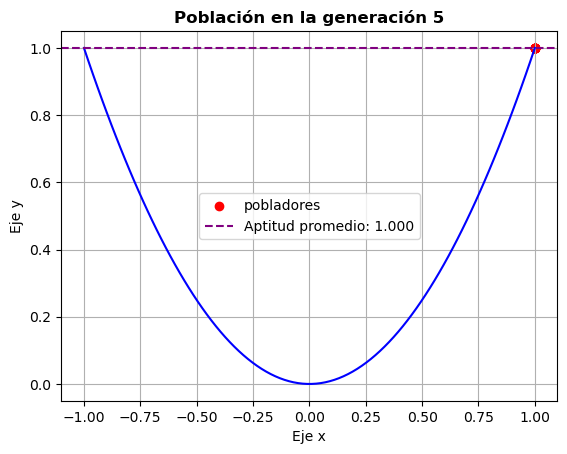

In [15]:
epocas = 10 #Epocas para iterar
pobladores_finales = algoritmo_genetico(poblacion_codificada, epocas) #Pobladores finales obtenidos y gráfica a través de generaciones

### Ejemplificación con 3 poblaciones diferentes

In [16]:
#Experimentos con poblaciones iniciales (3 poblaciones)
random.seed(34)
poblaciones = ['Poblacion 1', 'Poblacion 2', 'Poblacion 3']
matriz_poblaciones = pd.DataFrame(np.nan, index=range(10), columns = poblaciones)

for columna in matriz_poblaciones.columns:
    
    poblacion = random.sample(range(64), 10)
    poblacion_codificada = []
    for i in range(10): #ciclamos para obtener a los pobladores iniciales
        poblacion_codificada.append(decimal_a_binario(poblacion[i]))
    matriz_poblaciones[columna] = poblacion_codificada
matriz_poblaciones

,Poblacion 1,Poblacion 2,Poblacion 3
0,101101,001000,001100
1,100101,011011,010001
2,000001,111101,010110
3,110101,010011,100111
4,001110,010101,000000
5,111001,000110,110001
6,111101,100101,001001
7,111000,100000,110000
8,011000,110100,100001
9,010111,001001,000101


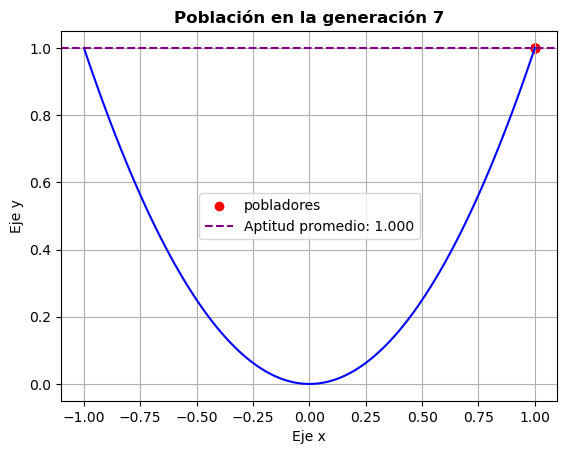

In [29]:
epocas = 10 #Epocas para iterar
pobladores_finales = algoritmo_genetico(matriz_poblaciones["Poblacion 1"].to_numpy(), epocas) #Pobladores finales obtenidos y gráfica a través de generaciones
#Puede realizarse una prueba con la población inicial 1, 2 o 3, y con el algoritmo elegido dentro del algoritmo genético y el método de selección y el método de cruza dentro de él.